In [1]:
import json
from collections import defaultdict
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import pandas as pd
from rliable import plot_utils
plt.rcParams['text.usetex'] = False #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r'\usepackage{sansmath} \sansmath' #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = ['Helveta Nue'] # Choose a nice font here
sns.set_style("whitegrid")

COLORS = ['#BBCC33', '#77AADD', '#44BB99',
           '#EEDD88', '#EE8866', '#FFAABB',
          '#99DDFF', '#44BB99', '#AAAA00',
          '#DDDDDD']
palette = sns.set_palette(COLORS)

/home/cmu/miniconda3/envs/test/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reward curves

In [2]:
def plot_curve(data_file, metric, metric_wandb, output_file, is_train_metric=False, include_third_stage=False):
    reward = pd.read_csv(data_file)

    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=300)
    fig.set_size_inches(496.0/192*2, 369.6/192*2)

    first_stage_end = 60
    if is_train_metric:
        second_stage_start = 61
    else:
        second_stage_start = 60

    sns.lineplot(data=reward[(reward['Step'] >= 0) & (reward['Step'] <= first_stage_end)], x='Step', y=f"both - {metric_wandb}", ax=ax, linewidth=3, markersize=8, color=COLORS[0], linestyle='--')
    sns.lineplot(data=reward[(reward['Step'] >= second_stage_start) & (reward['Step'] <= 120)], x='Step', y=f"both - {metric_wandb}", ax=ax, linewidth=3, markersize=8, color=COLORS[0], label=r'coupled')

    sns.lineplot(data=reward[(reward['Step'] >= 0) & (reward['Step'] <= first_stage_end)], x='Step', y=f"difficulty - {metric_wandb}", ax=ax, linewidth=3, markersize=8, color=COLORS[1], linestyle='--')
    sns.lineplot(data=reward[(reward['Step'] >= second_stage_start) & (reward['Step'] <= 120)], x='Step', y=f"difficulty - {metric_wandb}", ax=ax, linewidth=3, markersize=8, color=COLORS[1], label=r'task')
    if include_third_stage:
        sns.lineplot(data=reward[(reward['Step'] >= 121) & (reward['Step'] <= 180)], x='Step', y=f"difficulty - {metric_wandb}", ax=ax, linewidth=3, markersize=8, color=COLORS[1], linestyle=':')

    plot_utils._annotate_and_decorate_axis(ax,
                                            xlabel='gradient steps',
                                            ylabel=metric,
                                            labelsize='xx-large',
                                            ticklabelsize='xx-large',
                                            grid_alpha=0.2,
                                            legend=True)

    ax.legend(
            prop={'size': 16},         # Slightly smaller font
            title='Curriculum',
            title_fontsize=16,
            ncol=1,                    # Keep 1 column
            frameon=False,             # No box
            handlelength=1.2,          # Shrink line length
            handletextpad=0.4,         # Shrink space between marker and text
            borderpad=0.2,             # Shrink border padding inside legend box
            labelspacing=0.3,          # Reduce vertical space between entries
            # loc="center right",                # Optional: auto position
            markerscale=0.8,            # Shrink marker size
            # bbox_to_anchor=(-0.1, 1)
        )

    plt.savefig(output_file, bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.clf()

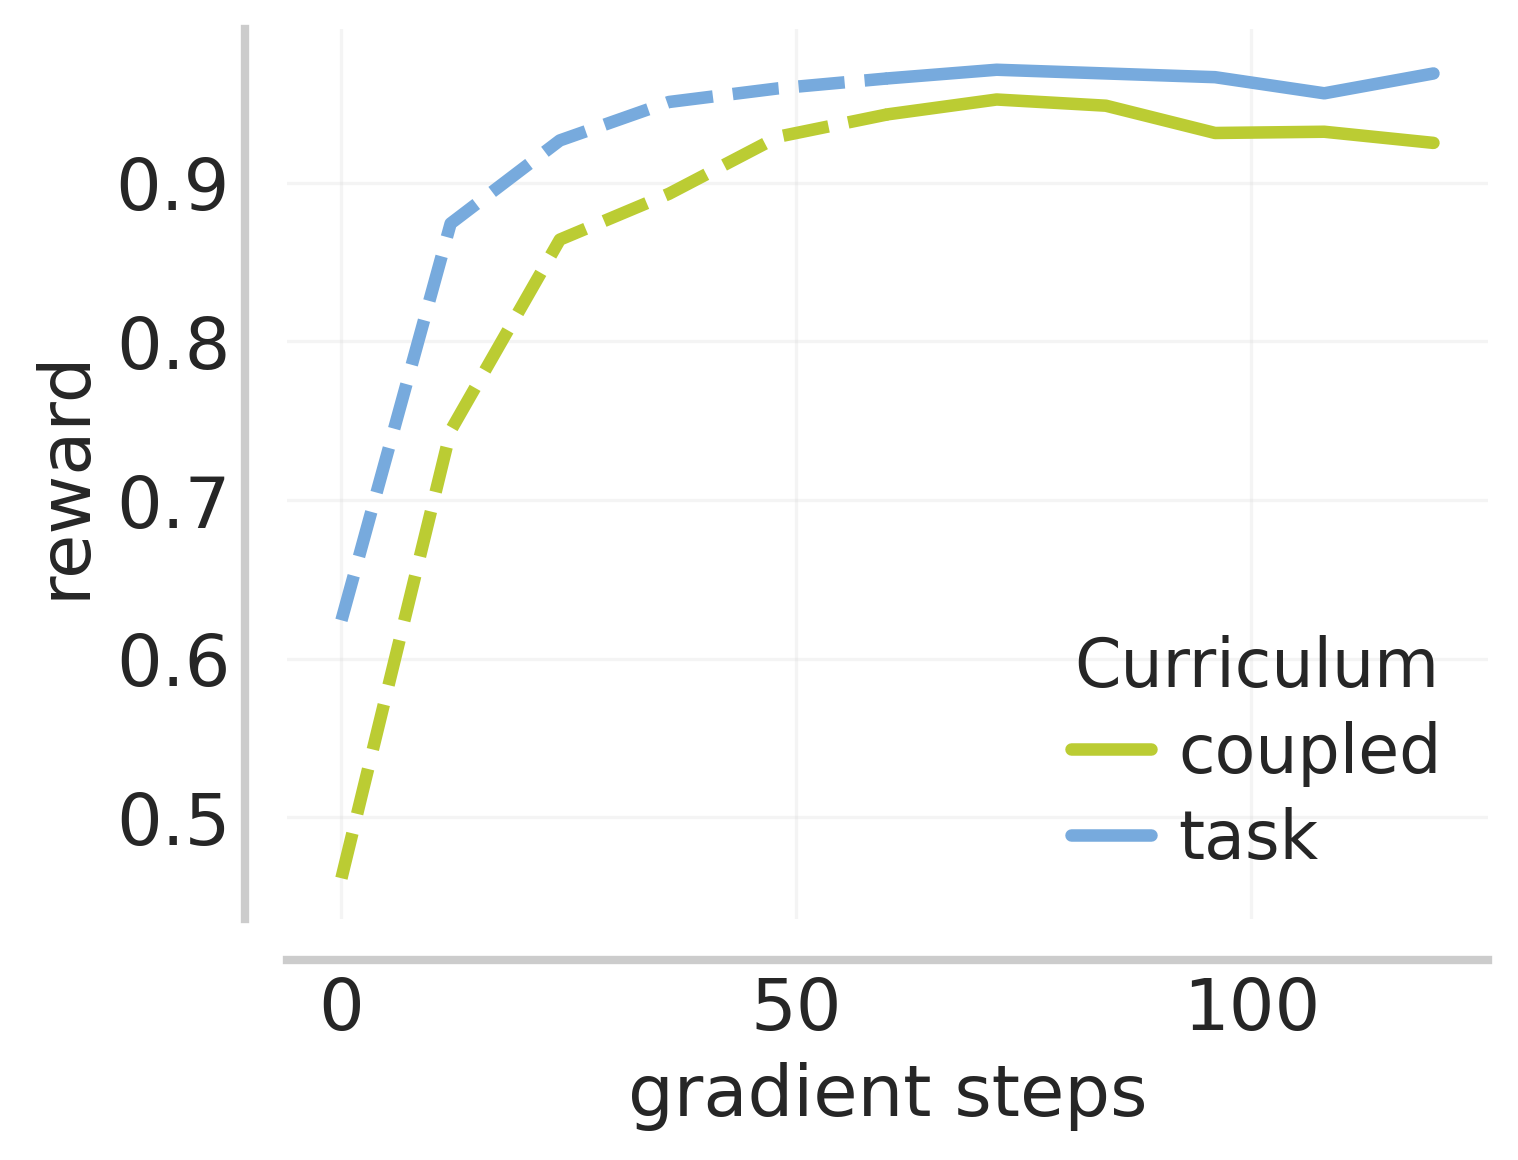

<Figure size 640x480 with 0 Axes>

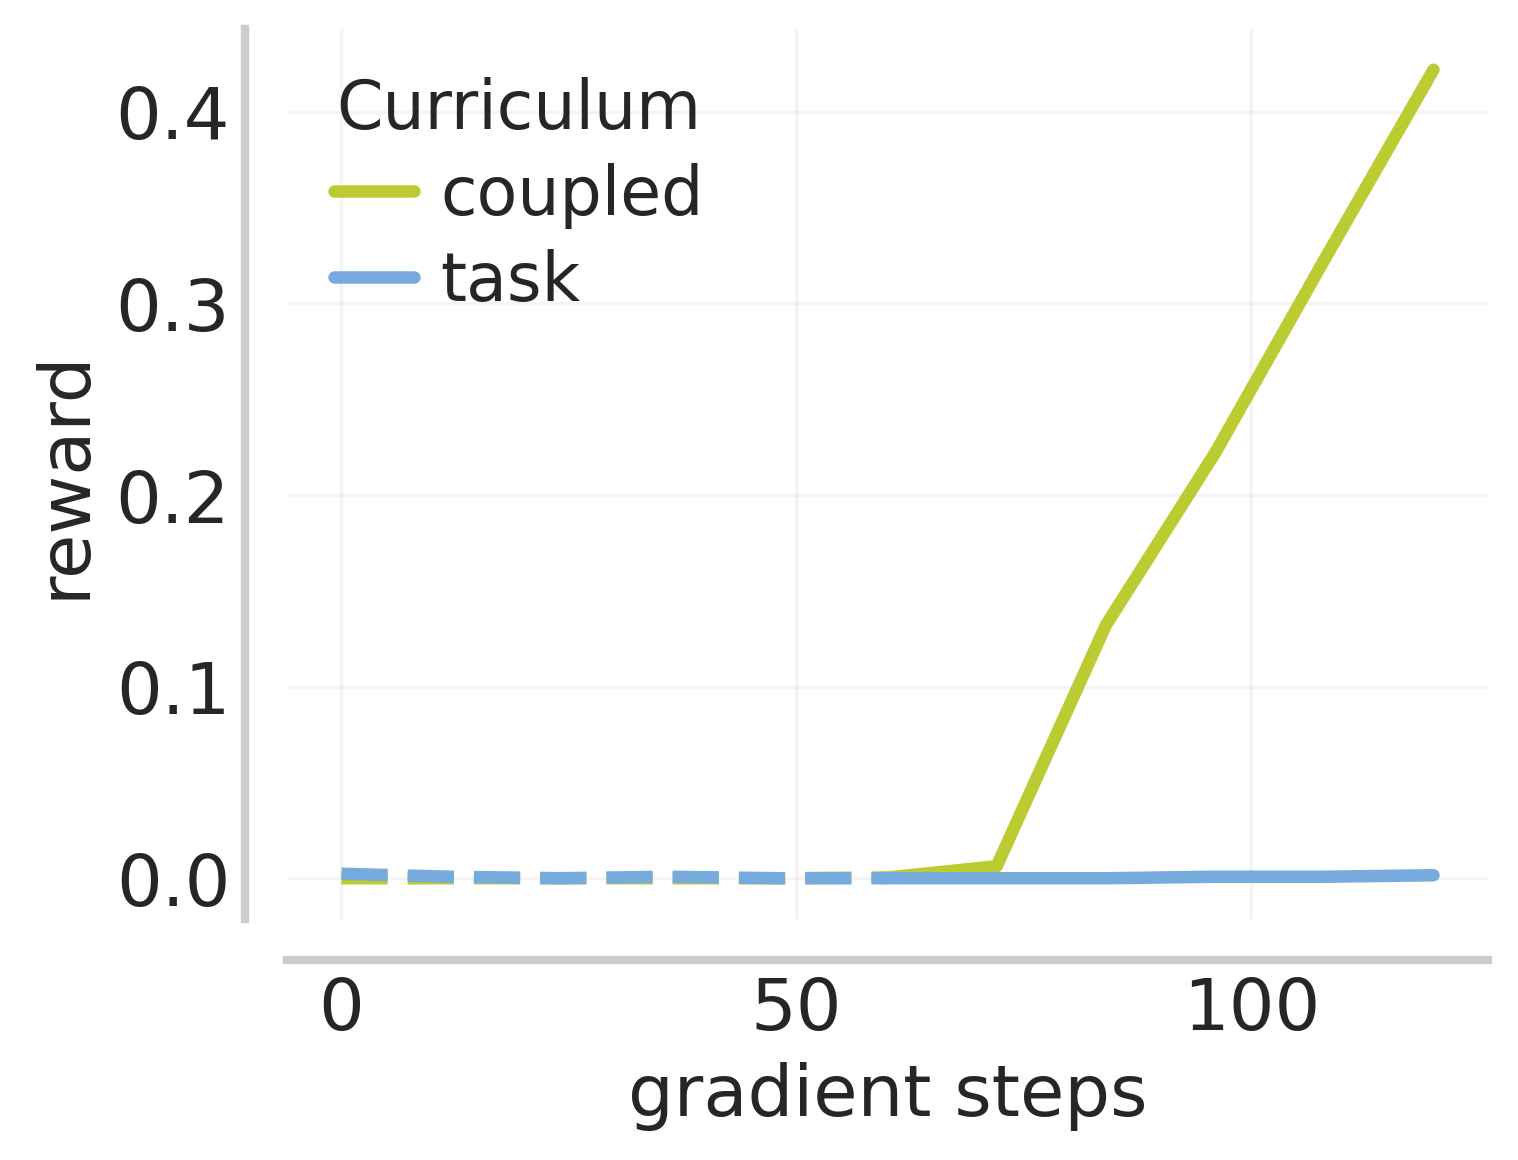

<Figure size 640x480 with 0 Axes>

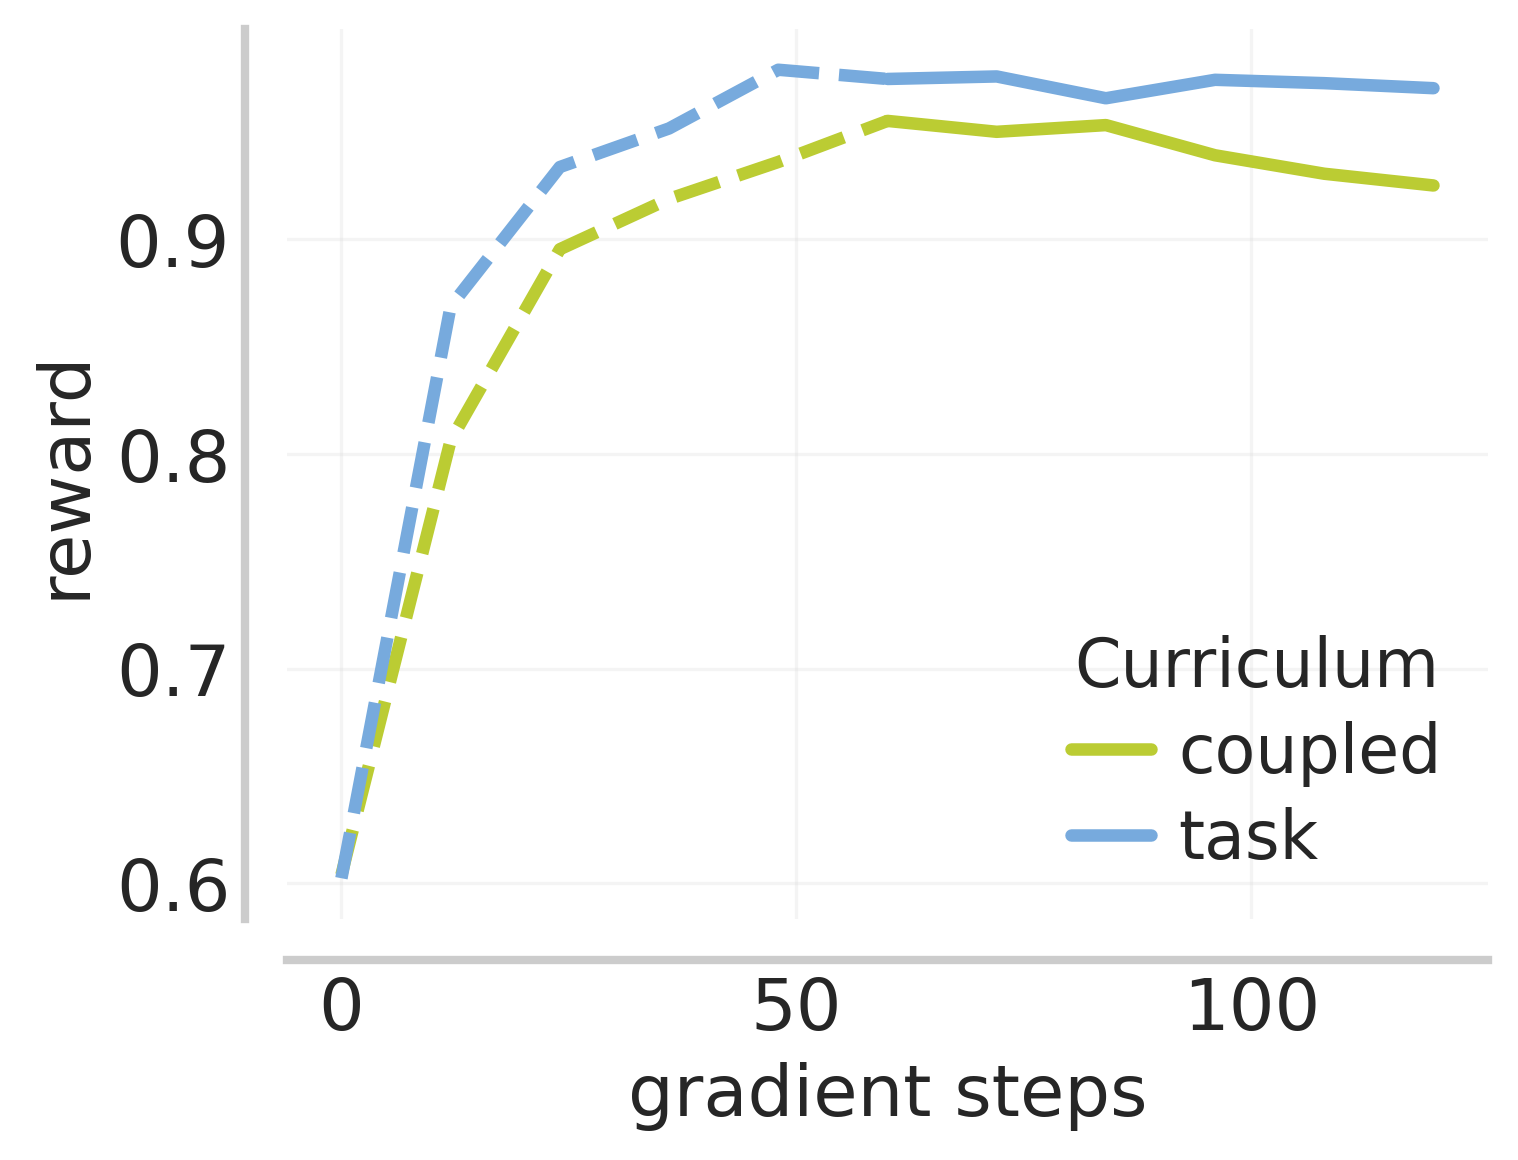

<Figure size 640x480 with 0 Axes>

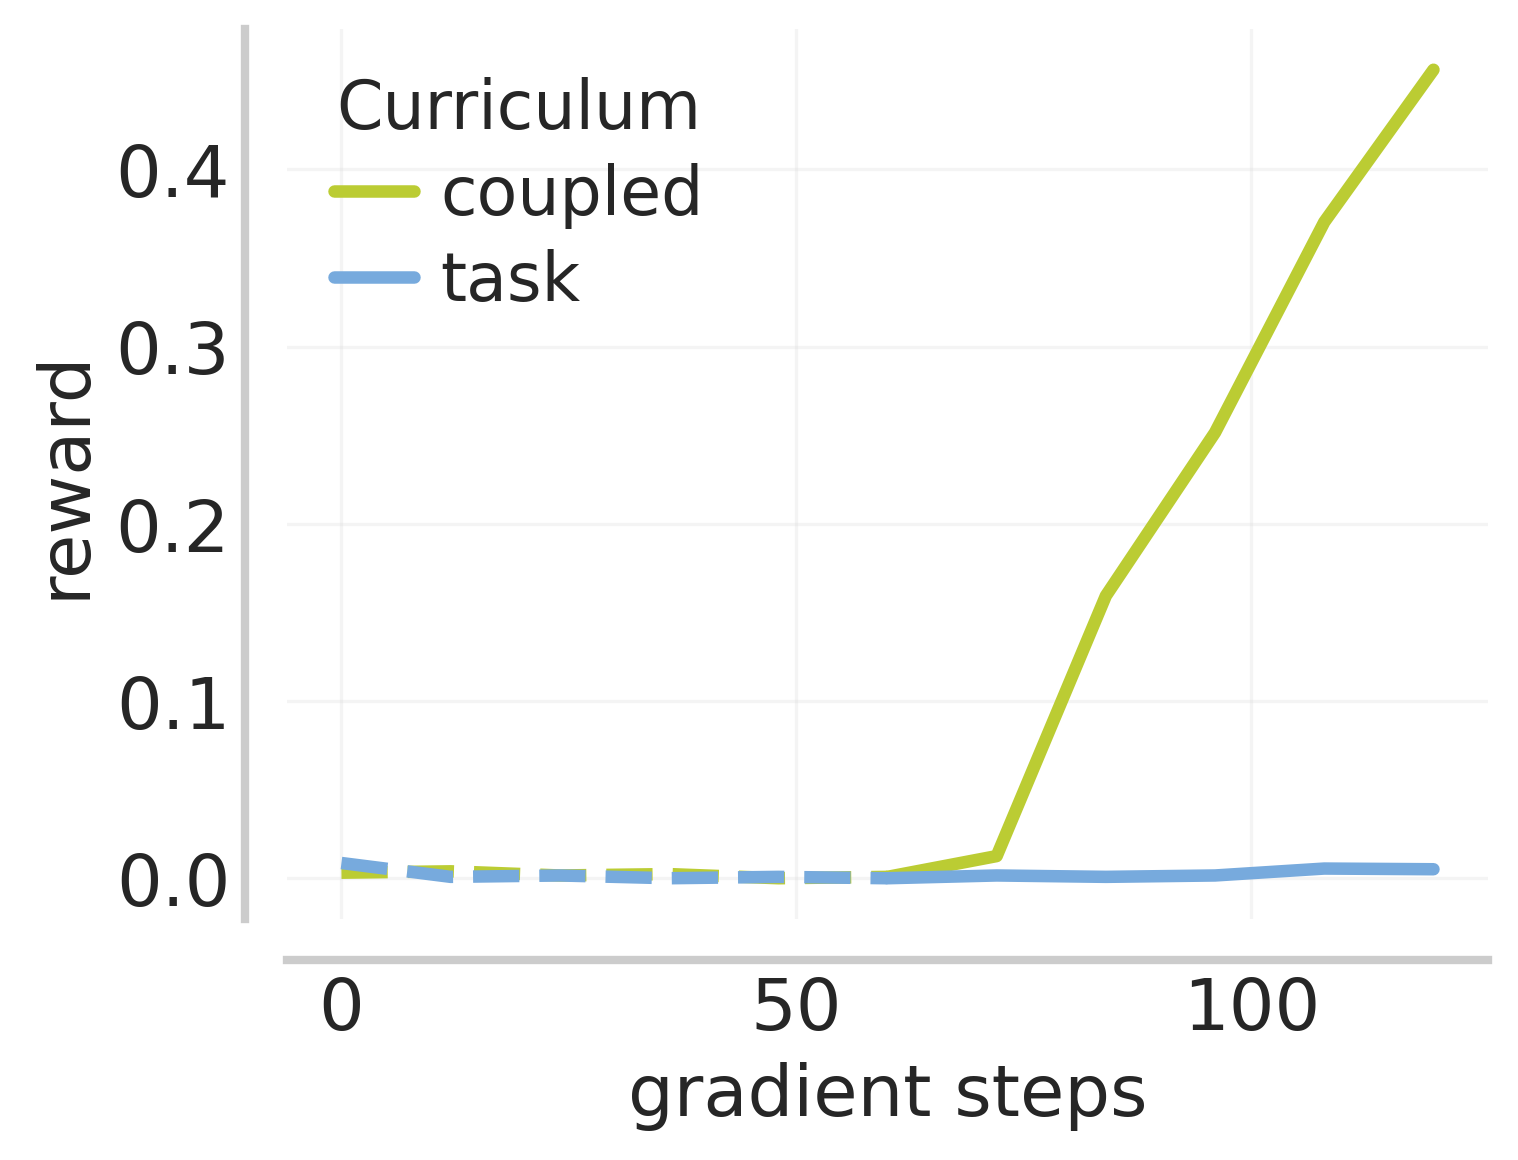

<Figure size 640x480 with 0 Axes>

In [3]:
plot_curve(data_file='data/reward_3.csv', metric='reward', metric_wandb='val/reward/3', output_file='plots/difficulty/reward_3.pdf')
plot_curve(data_file='data/reward_6.csv', metric='reward', metric_wandb='val/reward/6', output_file='plots/difficulty/reward_6.pdf')
plot_curve(data_file='data/extrapolation_reward_3.csv', metric='reward', metric_wandb='extrapolation_val/reward/3', output_file='plots/difficulty/extrapolation_reward_3.pdf')
plot_curve(data_file='data/extrapolation_reward_6.csv', metric='reward', metric_wandb='extrapolation_val/reward/6', output_file='plots/difficulty/extrapolation_reward_6.pdf')

### Entropy and KL

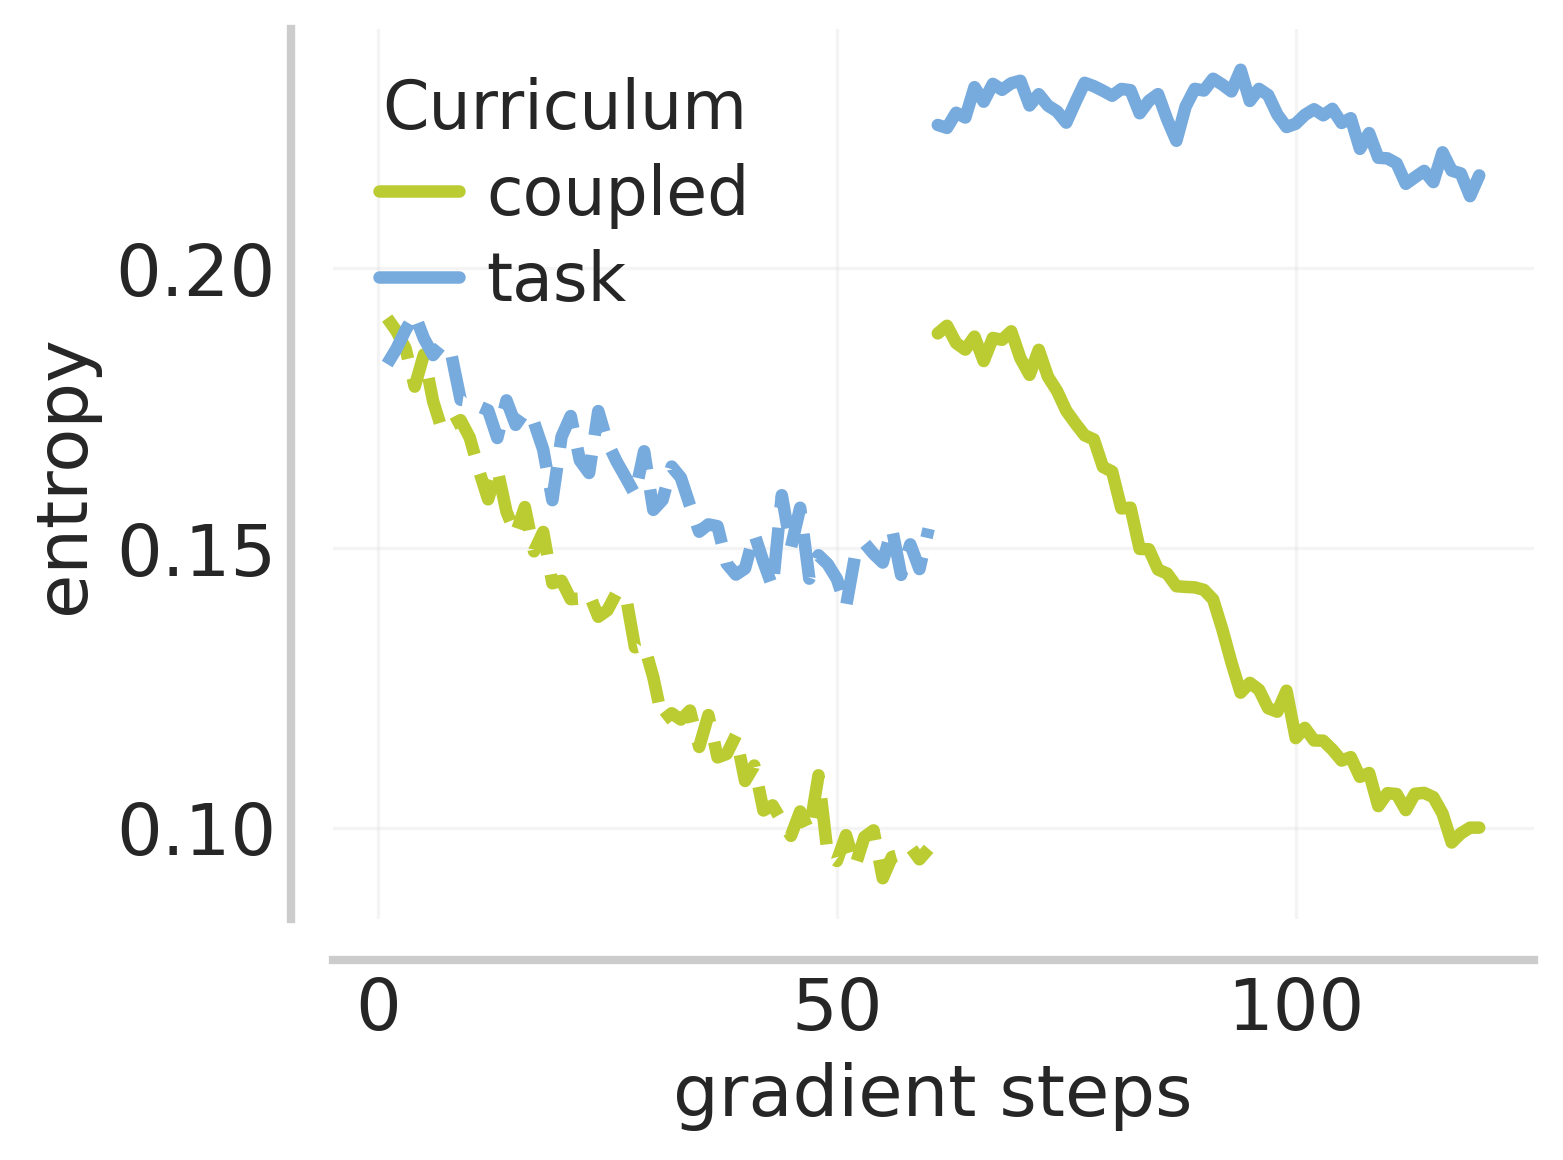

<Figure size 640x480 with 0 Axes>

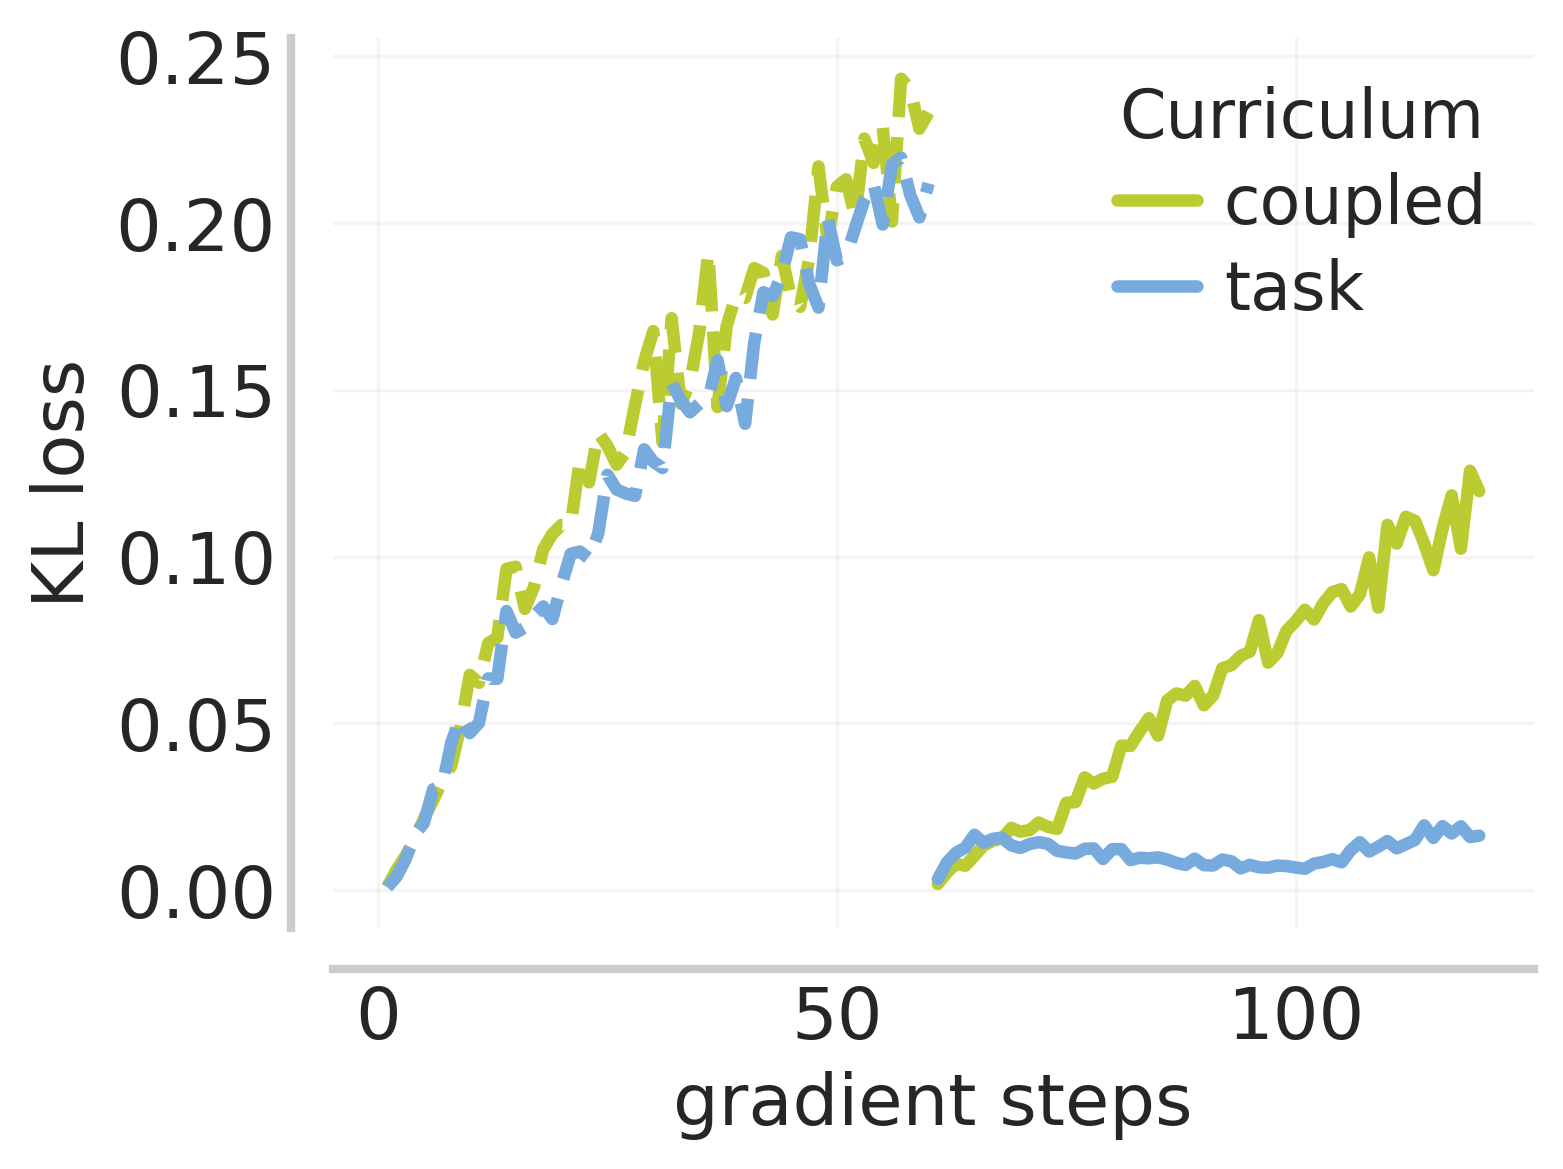

<Figure size 640x480 with 0 Axes>

In [4]:
plot_curve(data_file='data/entropy.csv', metric='entropy', metric_wandb='actor/entropy', output_file='plots/difficulty/entropy.pdf', is_train_metric=True)
plot_curve(data_file='data/kl.csv', metric='KL loss', metric_wandb='actor/kl_loss', output_file='plots/difficulty/kl.pdf', is_train_metric=True)

### Third stage

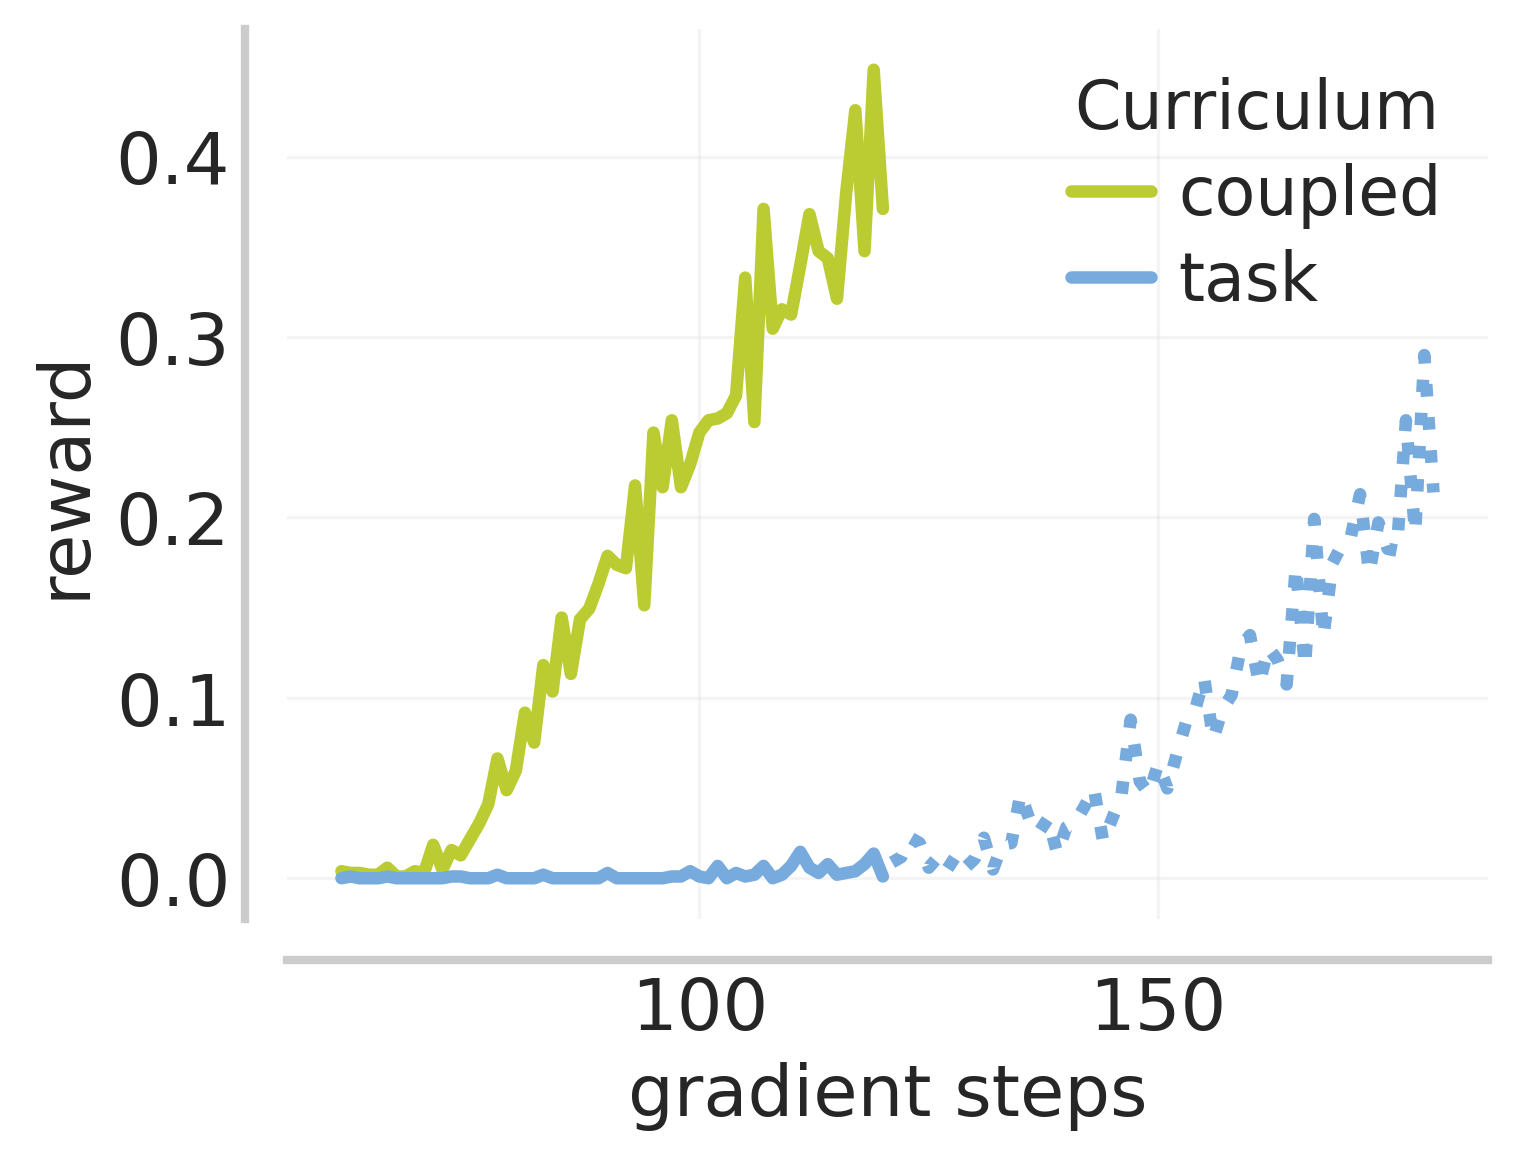

<Figure size 640x480 with 0 Axes>

In [5]:
plot_curve(data_file='data/train_reward_6.csv', metric='reward', metric_wandb='difficulty/reward/6', output_file='plots/difficulty/train_reward_6.pdf', is_train_metric=True, include_third_stage=True)